# ESTUDO DE CHURN APP DE COMIDA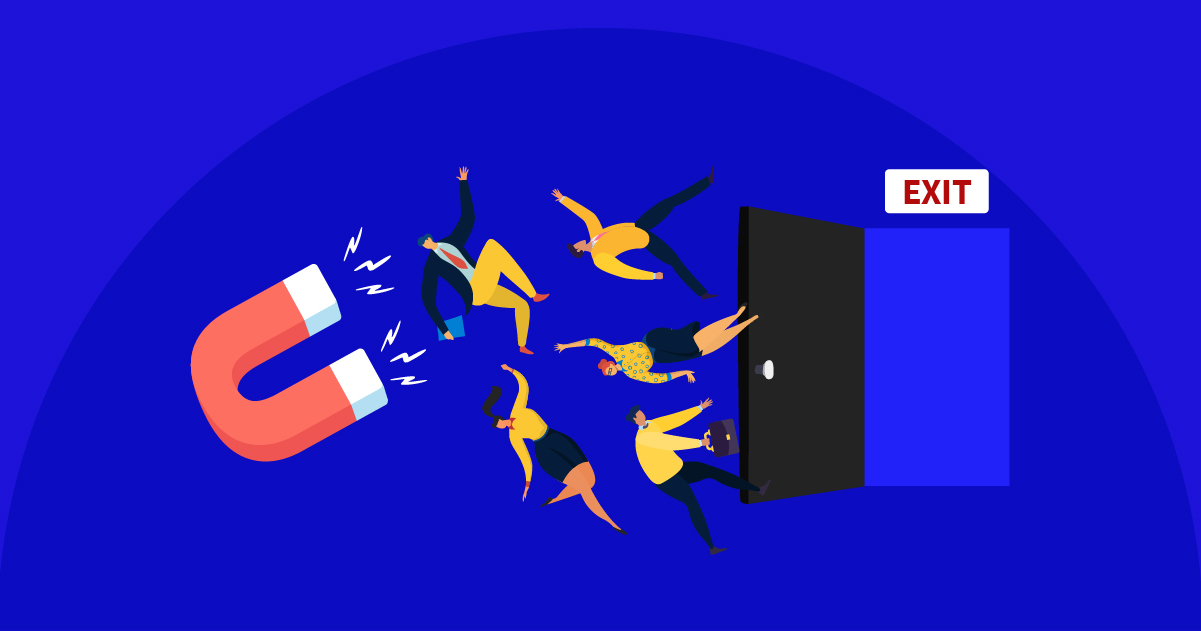


#SUMÁRIO:
1 - Metodologia.

2 - Entendimento do Negócio.

2.1 - Perguntas de Negócio.

3 - Entendimento e Preparação dos Dados

4 - EDA(Análise Exploratória dos Dados) &
Modelagem dos Dados

5 - Respondendo Problemas de Negócio.

6 - Considerações Finais.

# - METODOLOGIA

A abordagem metodológica escolhida para conduzir esta análise é a CRISP-DM, um modelo amplamente reconhecido que promove boas práticas, permitindo uma análise de dados eficaz. A estrutura desta metodologia se desdobra em seis etapas distintas, cada uma cuidadosamente projetada para otimizar a eficiência do processo, conforme ilustrado no gráfico a seguir:

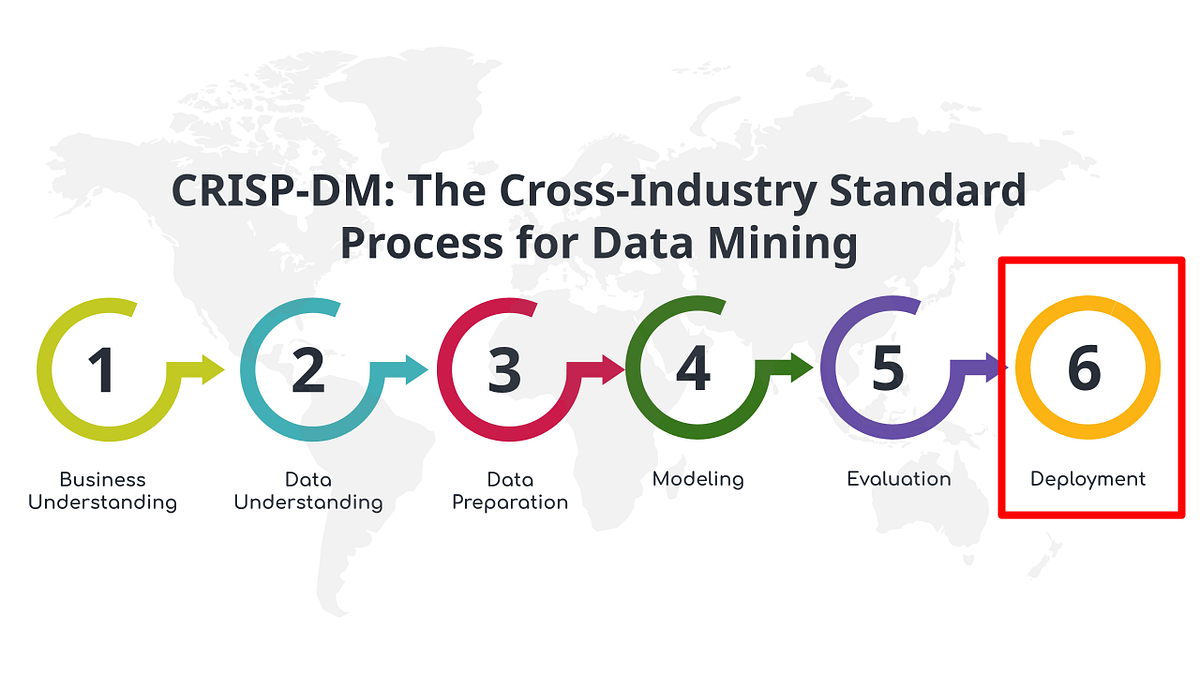

#ENTENDIMENTO DO NEGÓCIO

Churn em um aplicativo de comida:



O aplicativo ToComFome é um app de entrega de comida por delivery. Como todo aplicativo de varejo, a empresa se preocupa com o Churn de clientes, ou seja, da perda desse cliente para a concorrência. Para entender o perfil de risco do cliente com maior chance de churn, a área de CRM pediu um projeto para a área de Data Analytics para entender e classificar o cliente com risco de trocar de aplicativo nos próximos meses.

Para isso, a área de CRM passou uma amostra de cerca de 10 mil clientes com suas respectivas informações de cadastro e transações nos próximos 4 meses a contar da data de extração usada como referência.

Você foi convidado para atuar neste projeto, e como um(a) bom(a) analista de dados, é importante que você organize e estruture todas as etapas do trabalho. Esse material deverá ser apresentado aos executivos responsáveis pela área demandante em meados de Abril/22.







#PERGUNTAS DE NEGÓCIO

1. Quais fatores de risco estão associados com o Churn de Clientes?

2.    Segmentar os clientes com a probabilidade de darem Churn nos próximos 4 meses em relação à data de extração de referência.

3.    Quais os possíveis planos de ação que a empresa pode fazer para diminuir esse problema?

#ENTENDENDO OS DADOS

Os Dados foram retirados do banco de dados no SQL Server da escola Preditiva.Ai, antes de trazê-los para o ambiente Python fiz o tratamento e organização dos dados no próprio SQL, onde eu eu extraí os dados em CSV e trouxe para o Python, segue o DataFrame abaixo para melhor entendimento da composição dos dados:


INSTALANDO BIBLIOTECAS DE INTERESSE

In [30]:
!pip install scikit-learn

In [31]:
 pip install statsmodels

In [32]:
!pip install scorecardpy

In [33]:
pip install xgboost

In [34]:
##IMPORTANDO BIBLIOTECAS##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statistics as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.metrics import r2_score
import numpy as np
import scorecardpy as sc #iv

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
##LENDO PLANILHA EM CSV COM PANDAS, VERIFICANDO PRIMEIRAS 5 LINHAS##
df = pd.read_csv("/content/Case Churn ATT.csv")
df.head()


,clientid,Estado,Gênero,S_Credito,Gênero.1,Idade,Qte_Categ,Usa_Crédito,AnosDeCasa,P_Fidelidade,Pedidos_Acum,Churnbool
0,345580,São Paulo,Feminino,476,Feminino,34,2,1,10,0,109.0,0
1,345618,Minas Gerais,Masculino,698,Masculino,44,2,1,10,0,825.0,0
2,345635,Minas Gerais,Masculino,735,Masculino,43,2,1,10,1,819.0,0
3,345647,Minas Gerais,Feminino,416,Feminino,41,2,1,10,0,410.0,0
4,345653,Rio de Janeiro,Feminino,652,Feminino,75,2,1,10,1,478.0,0


#ANÁLISE EXPLORATÓRIA(EDA)

In [11]:
df[['Churnbool', 'Idade', 'AnosDeCasa', 'Qte_Categ', 'S_Credito', 'Pedidos_Acum', 'P_Fidelidade']].min()

Churnbool         0.0
Idade            18.0
AnosDeCasa        0.0
Qte_Categ         1.0
S_Credito       350.0
Pedidos_Acum      0.0
P_Fidelidade      0.0
dtype: float64

In [12]:
df[['Churnbool', 'Idade', 'AnosDeCasa', 'Qte_Categ', 'S_Credito', 'Pedidos_Acum', 'P_Fidelidade']].max()

Churnbool         1.0
Idade            92.0
AnosDeCasa       10.0
Qte_Categ         4.0
S_Credito       850.0
Pedidos_Acum    833.0
P_Fidelidade      1.0
dtype: float64

In [13]:
df[['Churnbool', 'Idade', 'AnosDeCasa', 'Qte_Categ', 'S_Credito', 'Pedidos_Acum', 'P_Fidelidade']].mean()

Churnbool         0.2013
Idade            38.9218
AnosDeCasa        5.0128
Qte_Categ         1.5302
S_Credito       650.5288
Pedidos_Acum    417.0416
P_Fidelidade      0.5151
dtype: float64

In [14]:
df[['Churnbool', 'Idade', 'AnosDeCasa', 'Qte_Categ', 'S_Credito', 'Pedidos_Acum', 'P_Fidelidade']].median()

Churnbool         0.0
Idade            37.0
AnosDeCasa        5.0
Qte_Categ         1.0
S_Credito       652.0
Pedidos_Acum    417.5
P_Fidelidade      1.0
dtype: float64

In [15]:
iv_info = sc.iv(df, 'Churnbool')
iv_info.round(2)



,variable,info_value
3,Qte_Categ,0.93
9,Idade,0.91
7,Pedidos_Acum,0.47
5,S_Credito,0.27
1,Estado,0.17
2,P_Fidelidade,0.15
4,Gênero.1,0.07
10,Gênero,0.07
0,AnosDeCasa,0.01
8,clientid,0.01


In [16]:
## AQUI CRIAMOS UM CÓDIGO PARA GERAR MAIS UMA COLUNA COM A DESCRIÇÃO DO IV
##BASEADO NOS VALORES DE REFERÊNCIA##

def rotular_iv(valor_iv):
    if valor_iv >= 0.8:
        return 'Muito Forte'
    elif valor_iv >= 0.5:
        return 'Forte'
    elif valor_iv >= 0.3:
        return 'Moderado'
    elif valor_iv >= 0.1:
        return 'Fraco'
    else:
        return 'Muito Fraco'

# Adicionei uma coluna 'IV_Descricao' com base nos valores de 'Churnbool'
iv_info['IV_Descricao'] = iv_info['info_value'].apply(rotular_iv)

# Exibindo o DataFrame resultante
display(iv_info)

,variable,info_value,IV_Descricao
3,Qte_Categ,0.931941,Muito Forte
9,Idade,0.910873,Muito Forte
7,Pedidos_Acum,0.473560,Moderado
5,S_Credito,0.268104,Fraco
1,Estado,0.166786,Fraco
2,P_Fidelidade,0.151655,Fraco
4,Gênero.1,0.072979,Muito Fraco
10,Gênero,0.072979,Muito Fraco
0,AnosDeCasa,0.009086,Muito Fraco
8,clientid,0.007140,Muito Fraco


**Conforme podemos ver acima, as variáveis que mais explicam o Churn são:**
- Quantidade de Categorias
- Idade ( Média de idade no APP: 38 anos)
- Pedidos Acumulados( Média de Pedidos no APP: 417)

**Se tornando as variáveis mais importantes a serem analisadas.**

De forma Análoga temos categorias menos importantes como:

- Gênero
- Tempo de Empresa
- Se o Cliente usa ou não Cartão de Crédito
- Score de Crédito
- Se o cliente possui ou não programa fidelidade
- Estado

Lembrando que uma relação fraca, ainda é uma relação, mas iremos trazer a partir daqui apenas as relações de "moderada" para cima em nosso escopo de análise

In [17]:
# Selecionando as variáveis de entrada (features) e a variável alvo (target)
X = df[['Qte_Categ', 'Idade', 'Pedidos_Acum']]
y = df['Churnbool']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinar o modelo Extreme Random Forest
modelo = ExtraTreesClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)
matriz_confusao = confusion_matrix(y_test, previsoes)

# Exibindo resultados
print(f'Acurácia do modelo: {acuracia:.2f}\n')
print('Relatório de Classificação:\n', relatorio_classificacao)
print('Matriz de Confusão:\n', matriz_confusao)

Acurácia do modelo: 0.80

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1618
           1       0.46      0.42      0.44       382

    accuracy                           0.80      2000
   macro avg       0.66      0.65      0.66      2000
weighted avg       0.79      0.80      0.79      2000

Matriz de Confusão:
 [[1430  188]
 [ 221  161]]


Com o IV(Information Value) identificamos as categorias que precisam ser analisadas, criei o modelo acima para predizer a probabilidade de Churn em cima dessas categorias, com isso chegamos a 80% de acurácia no nosso modelo, ou seja:

- Primeiro, vamos falar sobre a precisão geral do nosso modelo, que é uma ferramenta que usamos para fazer previsões. Ele está certo em cerca de 80% das vezes, o que é bom. No entanto, queremos olhar mais de perto porque o modelo nem sempre acerta da mesma maneira para todos os tipos de clientes.

- Quando olhamos para clientes que continuam conosco, nosso modelo faz um ótimo trabalho. Quando prevê que um cliente não vai cancelar, ele está certo 87% das vezes. E consegue capturar 88% dos clientes que realmente não cancelaram. Isso é bastante positivo!
Mas, quando se trata dos clientes que cancelam, o modelo não é tão preciso. Prevê corretamente apenas 46% das vezes. E perde alguns clientes que realmente cancelaram, cerca de 42%. Isso nos dá uma pista de onde precisamos melhorar.

- A matriz de confusão é como um resumo visual desses acertos e erros. Imagine que tivemos 1.618 clientes que o modelo identificou corretamente como não canceladores. Mas também houve 188 clientes que o modelo pensou que não cancelariam, mas que acabaram cancelando. Isso nos ajuda a entender onde o modelo pode estar confuso.

- Caso seja necessário, sugiro a empresa mais informações para melhorar o modelo, acredito que 80% é o suficiente, mais dados entretando nos traria mais acurácia.

- Em resumo, temos uma base sólida com uma precisão geral de 80%, mas sabemos onde podemos melhorar.

Com isso, agora podemos focar em estudar o perfil de cliente que mais dá Churn no nosso aplicativo levando em consideração s variáveis que mais importam como quantidade de categorias, idade e Pedidos acumulado.




CRIANDO TABELAS DE FREQUÊNCIA RELATIVA PARA AS VARIÁVEIS FORTE RELAÇÃO PELO IV

In [18]:

## Criando faixas de idade e pedidos acumulados
faixas_Idade = [18, 40, 60, 92]  # Exemplo de faixas de idade: 20-39, 40-59, 60-79
faixas_Pedidos_Acum = list(range(0, 1001, 200)) + [float('inf')]  # Adicione float('inf') para a última faixa

# Aplicando categorias aos dados
df['Faixa_Idade'] = pd.cut(df['Idade'], bins=faixas_Idade, labels=['20-39', '40-59', '60-79'])
df['Faixa_Pedidos_Acum'] = pd.cut(df['Pedidos_Acum'], bins=faixas_Pedidos_Acum, labels=[f"{i}-{i+199}" for i in range(0, 1001, 200)])

# Criando tabelas de frequência como frequência relativa (porcentagem em relação ao total)
tabela_Idade = pd.crosstab(df['Faixa_Idade'], df['Churnbool'], normalize='all') * 100
tabela_Pedidos_Acum = pd.crosstab(df['Faixa_Pedidos_Acum'], df['Churnbool'], normalize='all') * 100
tabela_Qte_Categ = pd.crosstab(df['Qte_Categ'], df['Churnbool'], normalize='all') * 100
# Exibindo as tabelas de frequência
display("Tabela de Frequência para Idade (%):")
display(tabela_Idade)

display("\nTabela de Frequência para Pedido Acumulado (%):")
display(tabela_Pedidos_Acum)

display("\nTabela de Frequência para Qte_Categ (%):")
display(tabela_Qte_Categ)

'Tabela de Frequência para Idade (%):'

Churnbool,0,1
Faixa_Idade,,
20-39,57.316095,6.794949
40-59,19.031870,12.206855
60-79,3.497695,1.152536


'\nTabela de Frequência para Pedido Acumulado (%):'

Churnbool,0,1
Faixa_Pedidos_Acum,,
0-199,18.859430,4.592296
200-399,19.849925,4.912456
400-599,19.379690,4.812406
600-799,18.449225,5.102551
800-999,3.341671,0.700350


'\nTabela de Frequência para Qte_Categ (%):'

Churnbool,0,1
Qte_Categ,,
1,36.89,13.95
2,42.47,3.43
3,0.49,2.17
4,0.02,0.58


PLOTANDO GRÁFICOS PARA ENTENDERMOS MELHOR AS VARIÁVEIS

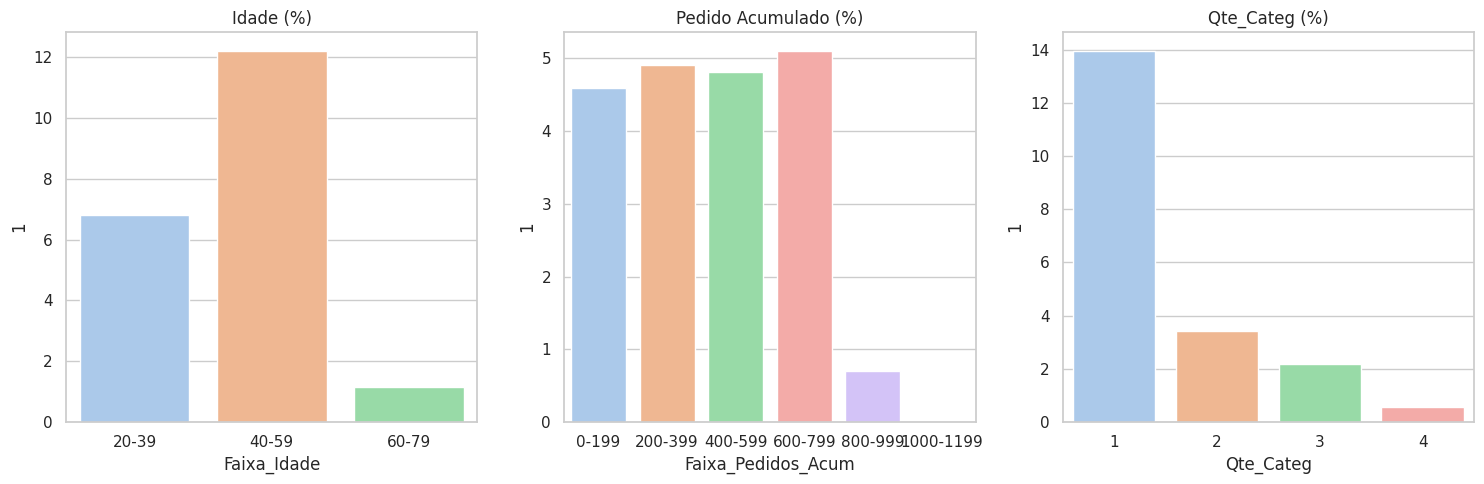

In [19]:
# Configurando o estilo Seaborn
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Plotando as tabelas de frequência usando Seaborn
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=tabela_Idade.index, y=tabela_Idade[1], ax=axs[0])
axs[0].set_title('Idade (%)')

sns.barplot(x=tabela_Pedidos_Acum.index, y=tabela_Pedidos_Acum[1], ax=axs[1])
axs[1].set_title('Pedido Acumulado (%)')

sns.barplot(x=tabela_Qte_Categ.index, y=tabela_Qte_Categ[1], ax=axs[2])
axs[2].set_title('Qte_Categ (%)')

plt.tight_layout()
plt.show()

CRIANDO MODELO DE MACHINE LEARNING PARA CALCULARMOS A PROBABILIDADE DOS CLIENTES DA BASE DAREM CHURN NOS PRÓXIMOS 4 MESES EM RELAÇÃO A DATA DE EXTRAÇÃO QUE 30/06/2019

In [29]:



# Defindo as variáveis independentes (X) e a variável dependente (y)
X = df[['Idade', 'AnosDeCasa', 'Qte_Categ', 'S_Credito', 'Pedidos_Acum', 'P_Fidelidade']]
y = df['Churnbool']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializando o modelo de regressão logística
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliando a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia do modelo: {acuracia}')

# Imprimindo o relatório de classificação
print(classification_report(y_test, previsoes))

Acurácia do modelo: 0.819
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2403
           1       0.69      0.17      0.27       597

    accuracy                           0.82      3000
   macro avg       0.76      0.57      0.58      3000
weighted avg       0.80      0.82      0.77      3000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Acessar os coeficientes e os nomes das variáveis
coeficientes = modelo.coef_[0]
nomes_variaveis = X.columns

# Criei um DataFrame para melhor visualização
coef_df = pd.DataFrame({'Variavel': nomes_variaveis, 'Coeficiente': coeficientes})

# Ordenei o DataFrame pelos coeficientes em ordem decrescente de magnitude
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Imprimindo os coeficientes
display(coef_df)

,Variavel,Coeficiente
0,Idade,0.058450
4,Pedidos_Acum,-0.000124
3,S_Credito,-0.003240
1,AnosDeCasa,-0.043166
2,Qte_Categ,-0.302844
5,P_Fidelidade,-1.128098


#RESPONDENDO PROBLEMA DE NEGÓCIO



**1 - Quais fatores de risco estão associados com o Churn de Clientes?**

* Os principais fatores de risco associados ao Churn dos clientes são a idade, especificamente entre as faixas de 40 a 59 anos de idade, a Quantidade de Categorias, ou seja, clientes que compram apenas uma categoria de produtos tem tendência a trocarem de app e clientes com pedidos acumulados abaixo de 800 tem uma forte tendência a dar Churn

**2 - Segmentar os clientes com a probabilidade de darem Churn nos próximos 4 meses em relação à data de extração de referência.**



**Idade** (**Coeficiente**: **0**.**058450**):

**Interpretação**: A idade tem um impacto positivo na probabilidade de churn. Isso significa que clientes mais velhos têm uma probabilidade ligeiramente maior de churn nos próximos 4 meses.

**Anos de Casa** (**Coeficiente: -0.043166**):

**Interpretação**: Quanto mais tempo um cliente permaneceu no app (mais anos de casa), menor é a probabilidade de churn. Um coeficiente negativo sugere uma relação inversa; ou seja, clientes mais antigos têm uma probabilidade menor de churn.

**Quantidade de Categorias** (**Coeficiente: -0.302844**):

**Interpretação**: A quantidade de categorias de produtos que um cliente comprou tem um impacto significativo na redução da probabilidade de churn. Clientes que compram em várias categorias têm uma probabilidade menor de churn.

**Score de Crédito** (**Coeficiente: -0.003240**):

**Interpretação**: Um score de crédito mais alto está associado a uma redução na probabilidade de churn. Clientes com um bom histórico de crédito têm uma probabilidade menor de churn.

**Pedidos Acumulados** (**Coeficiente: -0.000124**):

**Interpretação**: O número total de pedidos acumulados tem um impacto negativo muito pequeno na probabilidade de churn. Isso sugere que, na prática, o número total de pedidos tem uma influência mínima na previsão de churn.

**Programa de Fidelidade** (**Coeficiente: -1.128098**):

**Interpretação**: A participação em programas de fidelidade tem o maior impacto negativo na probabilidade de churn. Clientes que participam ativamente do programa de fidelidade têm uma probabilidade significativamente menor de churn.


Clientes mais jovens têm uma probabilidade ligeiramente maior de churn, enquanto clientes mais velhos e com mais anos de casa tendem a permanecer.
Clientes que compram em várias categorias, têm um bom histórico de crédito e participam ativamente do programa de fidelidade têm uma probabilidade significativamente menor de churn.
O número total de pedidos tem uma influência mínima na previsão de churn.
Esta narrativa é uma simplificação, e a interpretação exata pode depender da escala original das variáveis e da metodologia específica do modelo. Entretanto, essa é uma explicação geral que poderia ser comunicada a stakeholders para dar uma compreensão inicial do modelo e suas implicações.



**3 - Quais os possíveis planos de ação que a empresa pode fazer para diminuir esse problema?**

Por ordem:

* Criar programas de atração para clientes mais velhos dentro do app. (Time de Marketing)

* Criar um programa de incentivo com os parceiros no app para que os clientes tenham mais poder de compra, aumentando o número de pedidos total (Time Comercial)

* Criar mais promoções de pegue X e leve Y para aumentar a quantidade de categorias compradas, desta forma os clientes poderão provar mais produtos por categoria, fazendo com que sua segunda compra seja focada em levar mais de um. (Time de Marketing e Publicidade e Propaganda)

* Para resolver o problema com Score baixo podemos criar um programa de crédito por investimento dentro do app como fazem as fintechs, a partir de determinado valor colocado no app é convertido em crédito para uso dentro do próprio app. (Time Financeiro)

* Precisamos naturalmente também fazer com que mais clientes adotem programa fidelidade dentro do aplicativo. (Time de Marketing)






#CONSIDERAÇÕES FINAIS


Em suma essas ações irão impactar significativamente na redução de Churn do nosso app, vale lembrar que todo movimento gera custo, no nosso caso principalmente com times de Marketing, mas é um investimento que se bem aplicado, a médio prazo já irá gerar resultados positivos significativos para a empresa.
